 <table><tr><td bgcolor=#ffccff> <font color=#1a001a size=7 face="black body">This is KDA applied on benchmark dataset </font> </td></tr></table>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 <table><tr><td bgcolor=#99ff99> <font color=#3333ff size=10 face="black body">Preprocessing of dataset </font> </td></tr></table>
 

In [2]:
# -*- coding: utf-8 -*-
"""
Created on %(date)s

@author: %(username)s
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:

data=pd.read_csv('DSL-StrongPasswordData.csv')



In [4]:
data.shape

(20400, 34)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

In [6]:
data.isnull().sum()

subject            0
sessionIndex       0
rep                0
H.period           0
DD.period.t        0
UD.period.t        0
H.t                0
DD.t.i             0
UD.t.i             0
H.i                0
DD.i.e             0
UD.i.e             0
H.e                0
DD.e.five          0
UD.e.five          0
H.five             0
DD.five.Shift.r    0
UD.five.Shift.r    0
H.Shift.r          0
DD.Shift.r.o       0
UD.Shift.r.o       0
H.o                0
DD.o.a             0
UD.o.a             0
H.a                0
DD.a.n             0
UD.a.n             0
H.n                0
DD.n.l             0
UD.n.l             0
H.l                0
DD.l.Return        0
UD.l.Return        0
H.Return           0
dtype: int64

In [7]:
data.describe()

,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,...,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,4.500000,25.500000,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,...,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,2.291344,14.431223,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,...,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,1.000000,1.000000,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,...,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,2.750000,13.000000,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,...,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,4.500000,25.500000,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,...,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,6.250000,38.000000,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,...,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,8.000000,50.000000,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,...,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


In [8]:
data.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

In [9]:
data['subject'].value_counts()

subject
s002    400
s003    400
s004    400
s005    400
s007    400
s008    400
s010    400
s011    400
s012    400
s013    400
s015    400
s016    400
s017    400
s018    400
s019    400
s020    400
s021    400
s022    400
s024    400
s025    400
s026    400
s027    400
s028    400
s029    400
s030    400
s031    400
s032    400
s033    400
s034    400
s035    400
s036    400
s037    400
s038    400
s039    400
s040    400
s041    400
s042    400
s043    400
s044    400
s046    400
s047    400
s048    400
s049    400
s050    400
s051    400
s052    400
s053    400
s054    400
s055    400
s056    400
s057    400
Name: count, dtype: int64

In [12]:
data.columns

Index(['subject', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return'],
      dtype='object')

In [11]:

data.drop(columns=['sessionIndex','rep'],axis=1,inplace=True)



KeyError: "['sessionIndex', 'rep'] not found in axis"

In [13]:

visual_data=data
#One Hot encoding the subject column. seperating the label from the rest of columns
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
unique_cols=data['subject'].nunique()

data=np.array(ct.fit_transform(data))
X=data[:,unique_cols:]
y=data[:,:unique_cols]
print(y.shape)


#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#training:validation:test=70:0:30

#applying feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

X_test=sc.transform(X_test)



(20400, 51)


In [14]:
X.shape

(20400, 31)

In [15]:
y.shape

(20400, 51)

In [17]:
visual_data=pd.read_csv('DSL-StrongPasswordData.csv')
visual_data.drop(columns=['sessionIndex','rep'],axis=1,inplace=True)


 <table><tr><td bgcolor=#ffffcc> <font color=#9900cc size=10 face="black body">Training Model </font> </td></tr></table>

In [18]:
import tensorflow as tf
cnn=tf.keras.models.Sequential()

#cnn.add(tf.keras.layers.Flatten())
#
'''cnn.add(tf.keras.layers.Dense(
units=256,activation='relu'
))'''
cnn.add(tf.keras.layers.Dense(
units=256,activation='relu'
))

cnn.add(BatchNormalization())

cnn.add(tf.keras.layers.Dense(
units=512,activation='relu'
))

cnn.add(BatchNormalization())

cnn.add(tf.keras.layers.Dense(
units=1024,activation='relu'
))

cnn.add(BatchNormalization())

cnn.add(tf.keras.layers.Dense(
units=512,activation='relu'
))
cnn.add(BatchNormalization())

cnn.add(tf.keras.layers.Dense(
    units=unique_cols,activation='sigmoid'
))

cnn.compile(
optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

batch_size = 32


epochs=50

In [19]:
import datetime
%load_ext tensorboard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',model='auto',patience=15,verbose=1,restore_best_weights=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


hist=cnn.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_split = 0.0, verbose = 1)


Epoch 1/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5929 - loss: 0.3258
Epoch 2/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8504 - loss: 0.0200
Epoch 3/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8964 - loss: 0.0138
Epoch 4/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9200 - loss: 0.0107
Epoch 5/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9354 - loss: 0.0088
Epoch 6/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9433 - loss: 0.0077
Epoch 7/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9473 - loss: 0.0074
Epoch 8/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9519 - loss: 0.0067
Epoch 9/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9576 - loss: 0.0062
Epoch 10/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9632 - loss: 0.0053
Epoch 11/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9675 - loss: 0.0049
Epoch 12/50
447/447 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [20]:
print(cnn.summary())



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 51)             │        26,163 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,666,587 (13.99 MB)

 Trainable params: 1,220,659 (4.66 MB)

 Non-trainable params: 4,608 (18.00 KB)

 Optimizer params: 2,441,320 (9.31 MB)

None


In [21]:
#print(hist.history['loss'])

score,acc = cnn.evaluate(X_test, y_test, verbose = 1, batch_size = batch_size)
print("score: "+str(score)+" accuracy: "+str(acc))

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9398 - loss: 0.0128
score: 0.01353316567838192 accuracy: 0.9354575276374817


 <table><tr><td bgcolor=#ffff99> <font color=#b30059 size=10 face="black body">Insights into Training the Dataset </font> </td></tr></table>


In [22]:
train_loss = hist.history['loss']
#val_loss   = hist.history['val_loss']
acc = hist.history['accuracy']
#val_acc = hist.history['val_accuracy']


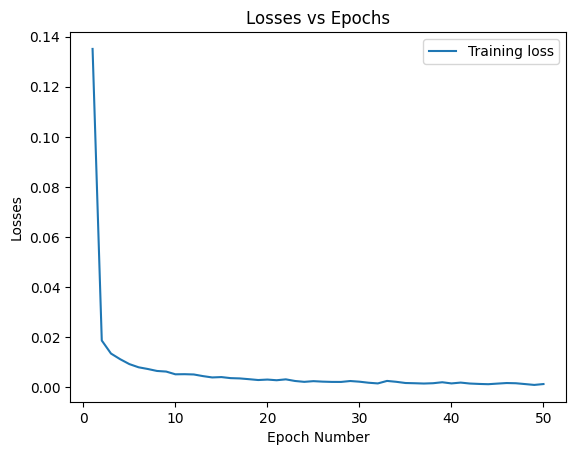

In [23]:
plt.plot(range(1,epochs+1),train_loss)
#plt.plot(range(1,epochs+1),val_loss)
plt.title('Losses vs Epochs')
plt.xlabel('Epoch Number')
plt.ylabel('Losses')
plt.legend(["Training loss"])
#plt.legend(["Training loss", "Validation loss"])

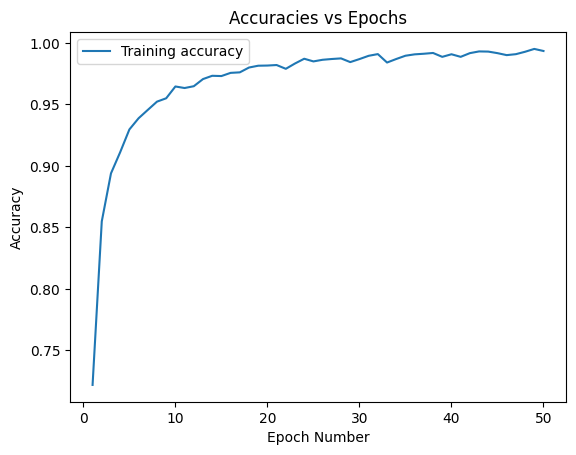

In [24]:
plt.plot(range(1,epochs+1),acc)
#plt.plot(range(1,epochs+1),val_acc)
plt.title('Accuracies vs Epochs')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(["Training accuracy"]) 
#plt.legend(["Training accuracy", "Validation accuracy"])

In [25]:
y_pred=cnn.predict(X_test)
'''as the softmax outputs probability of each class there is need for conversion from  probability to 0s and 1s
where the class corresponding to highest probability will be set to 1 and the rest to 0s.
y_pred is an array of probabilities where y_pred_binary is an array of 0s and 1s.'''
y_pred_binary=np.zeros(shape=y_pred.shape)
examples=y_pred.shape[0]
print(examples)
for i in range(examples):
    index=np.argmax(y_pred[i])
    y_pred_binary[i][index]=1


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
6120


In [26]:
data

array([[1.    , 0.    , 0.    , ..., 0.3509, 0.2171, 0.0742],
       [1.    , 0.    , 0.    , ..., 0.2756, 0.1917, 0.0747],
       [1.    , 0.    , 0.    , ..., 0.2847, 0.1762, 0.0945],
       ...,
       [0.    , 0.    , 0.    , ..., 0.2017, 0.0983, 0.0905],
       [0.    , 0.    , 0.    , ..., 0.1917, 0.0938, 0.0931],
       [0.    , 0.    , 0.    , ..., 0.1993, 0.1186, 0.1018]])

 # <table><tr><td bgcolor=#b3ffff> <font color= #990099 size=10 face="black body">ROC Curve</font> </td></tr></table>


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


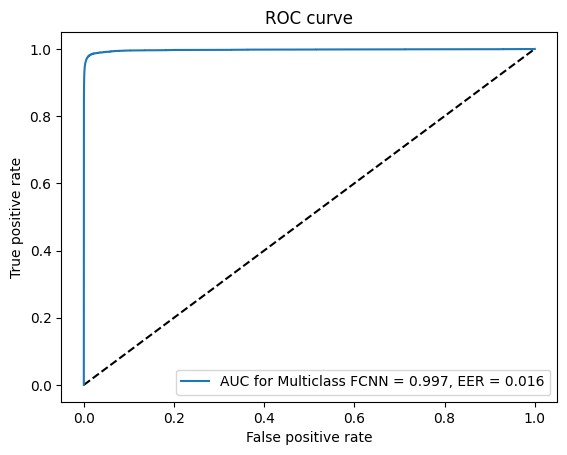

In [27]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from scipy.optimize import brentq
from scipy.interpolate import interp1d

def plotROC():
        
    predictions = cnn.predict(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test.flatten(), predictions.flatten())
    eer = brentq(lambda x : 1.0 - x - interp1d(fpr, tpr)(x), 0.0, 1.0)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC for {:5s} = {:.3f}, EER = {:.3f}'.format(
        "Multiclass FCNN", auc(fpr, tpr), eer))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')

plotROC()

# <table><tr><td bgcolor=#99ff99> <font color= #0080ff size=10 face="black body">**Data Visualization**</font> </td></tr></table>




In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn # statistical graphs
import matplotlib.pyplot as plt # data visualization / graphs
plt.style.use('seaborn-dark')


OSError: 'seaborn-dark' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn # statistical graphs
import matplotlib.pyplot as plt # data visualization / graphs
plt.style.use('ggplot') # Utiliser un style intégré à Matplotlib

In [30]:
visual_data.iloc[:,:-1]

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return
0,s002,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,...,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171
1,s002,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,...,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917
2,s002,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,...,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762
3,s002,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,...,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387
4,s002,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,...,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,0.0757,-0.0188,...,0.1122,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049
20396,s057,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,0.0636,-0.0280,...,0.0201,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761
20397,s057,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,0.0462,-0.0259,...,0.0505,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983
20398,s057,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,0.0897,-0.0095,...,0.0383,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938


# <table><tr><td bgcolor=#99ff99> <font color= #0080ff size=10 face="black body">Correlation Plot</font> </td></tr></table>

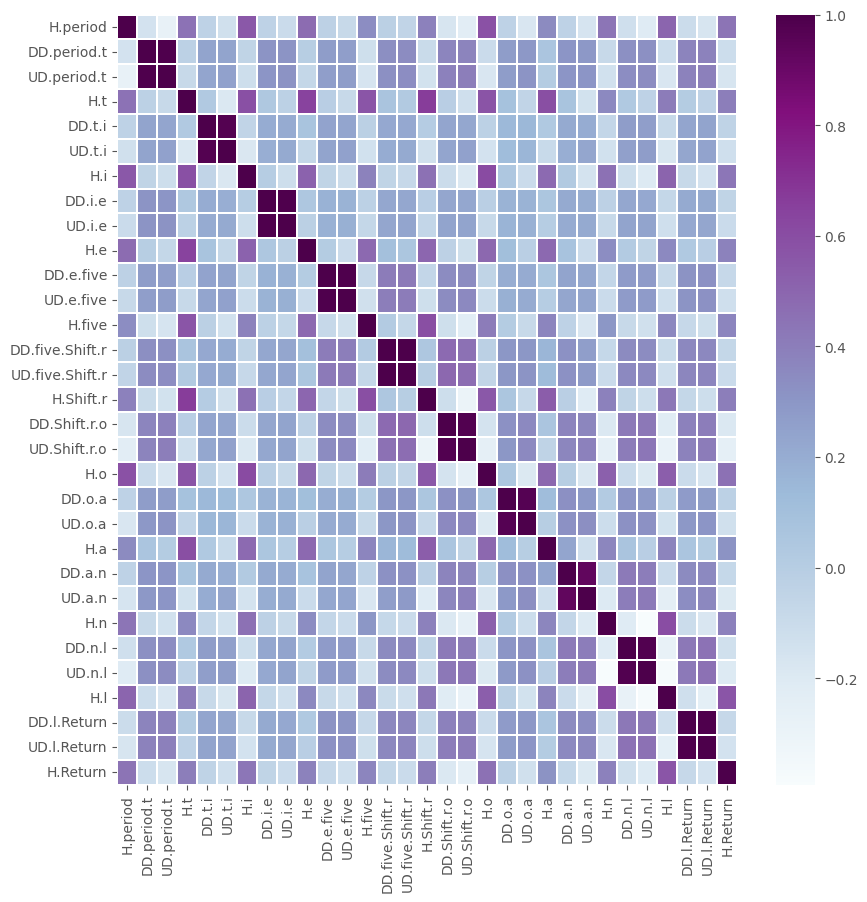

In [31]:
corrMatrix = visual_data[['H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']].corr()
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corrMatrix, linewidths=0.1, cmap="BuPu")
plt.show()

In [32]:
visual_data.columns
h_cols=['subject']
ud_cols=['subject']
dd_cols=['subject']
uu_cols=['subject']
for column in visual_data.columns:
    if 'H' in column:
        
        h_cols.append(str(column))
    if 'UD' in column:
        ud_cols.append(str(column))
    if 'DD' in column:
        dd_cols.append(str(column))
    if 'UU' in column:
        uu_cols.append(str(column))    
print(dd_cols)
print(uu_cols)
print(h_cols)
print(ud_cols)



['subject', 'DD.period.t', 'DD.t.i', 'DD.i.e', 'DD.e.five', 'DD.five.Shift.r', 'DD.Shift.r.o', 'DD.o.a', 'DD.a.n', 'DD.n.l', 'DD.l.Return']
['subject']
['subject', 'H.period', 'H.t', 'H.i', 'H.e', 'H.five', 'H.Shift.r', 'H.o', 'H.a', 'H.n', 'H.l', 'H.Return']
['subject', 'UD.period.t', 'UD.t.i', 'UD.i.e', 'UD.e.five', 'UD.five.Shift.r', 'UD.Shift.r.o', 'UD.o.a', 'UD.a.n', 'UD.n.l', 'UD.l.Return']


# <table><tr><td bgcolor=#ffb3d1> <font color= #0080ff size=10 face="black body"> Average Inter subject variation</font> </td></tr></table>



# <table><tr><td bgcolor=#ffb3d1> <font color=#0066ff size=10 face="black body">1.H Plots</font> </td></tr></table>



<Axes: >

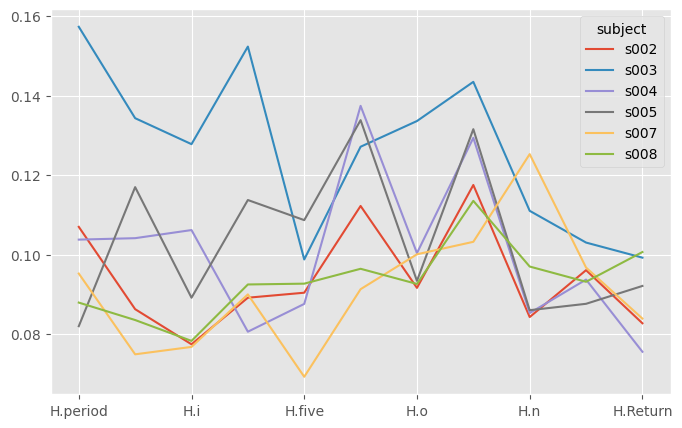

In [33]:
keyHoldLatency = visual_data[h_cols]
keyHoldLatency = keyHoldLatency.where((keyHoldLatency['subject']=='s002') | (keyHoldLatency['subject']=='s003') | (keyHoldLatency['subject']=='s004') | (keyHoldLatency['subject']=='s005') | (keyHoldLatency['subject']=='s007') | (keyHoldLatency['subject']=='s008'))
keyHoldLatency = keyHoldLatency.groupby('subject').agg('mean')
keyHoldLatency.T.plot(figsize=(8,5))

# <table><tr><td bgcolor=#ffb3d1> <font color=#ff1a1a size=10 face="black body">2.UD Plots</font> </td></tr></table>




<Axes: >

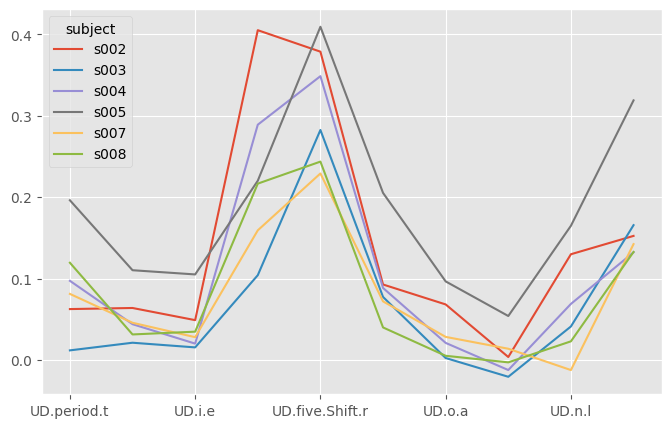

In [34]:
keyUDLatency = visual_data[ud_cols]
keyUDLatency = keyUDLatency.where((keyUDLatency['subject']=='s002') | (keyUDLatency['subject']=='s003') | (keyUDLatency['subject']=='s004') | (keyUDLatency['subject']=='s005') | (keyUDLatency['subject']=='s007') | (keyUDLatency['subject']=='s008'))
keyUDLatency = keyUDLatency.groupby('subject').agg('mean')
keyUDLatency.T.plot(figsize=(8,5))

# <table><tr><td bgcolor=#ffb3d1> <font color= #33ccff size=10 face="black body">3.DD Plots</font> </td></tr></table>





<Axes: >

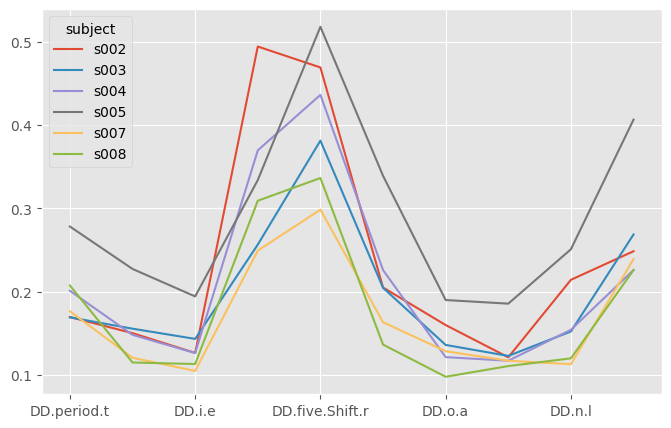

In [35]:
keyDDLatency = visual_data[dd_cols]
keyDDLatency = keyDDLatency.where((keyDDLatency['subject']=='s002') | (keyDDLatency['subject']=='s003') | (keyDDLatency['subject']=='s004') | (keyDDLatency['subject']=='s005') | (keyDDLatency['subject']=='s007') | (keyDDLatency['subject']=='s008'))
keyDDLatency = keyDDLatency.groupby('subject').agg('mean')
keyDDLatency.T.plot(figsize=(8,5))

# <table><tr><td bgcolor=#ffff80> <font color=#800080 size=10 face="black body">Intrasubject variation</font> </td></tr></table>


# <table><tr><td bgcolor=#ffff80> <font color=#0044cc size=10 face="black body">1.H plot</font> </td></tr></table>


<Axes: >

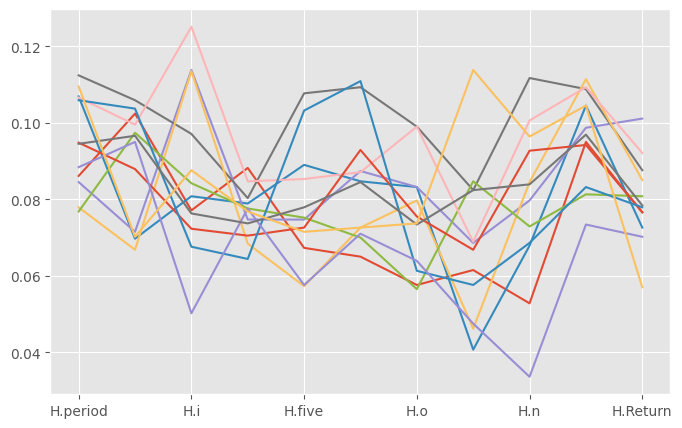

In [36]:
subKeyHoldLatency =visual_data.where((visual_data['subject']=='s021')).dropna().sample(n=12)
subKeyHoldLatency = subKeyHoldLatency[['subject','H.period','H.t','H.i', 'H.e','H.five','H.Shift.r','H.o','H.a','H.n','H.l','H.Return']]
subKeyHoldLatency = subKeyHoldLatency.set_index('subject')
subKeyHoldLatency.T.plot(figsize=(8,5), legend=False)

# <table><tr><td bgcolor=#ffff80> <font color=#0044cc size=10 face="black body">2.UD plot</font> </td></tr></table>




<Axes: >

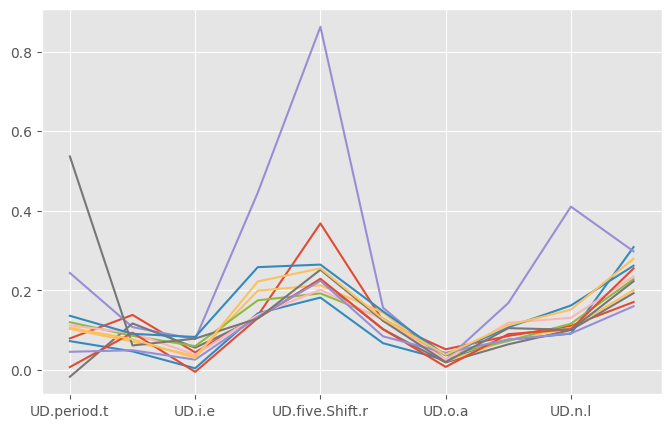

In [37]:
subKeyUDLatency = visual_data.where((visual_data['subject']=='s021')).dropna().sample(n=12)
subKeyUDLatency = subKeyUDLatency[['subject','UD.period.t','UD.t.i','UD.i.e','UD.e.five','UD.five.Shift.r','UD.Shift.r.o','UD.o.a','UD.a.n','UD.n.l','UD.l.Return']]
subKeyUDLatency = subKeyUDLatency.set_index('subject')
subKeyUDLatency.T.plot(figsize=(8,5), legend=False)

# <table><tr><td bgcolor=#ffff80> <font color=#0044cc size=10 face="black body">3.DD plot</font> </td></tr></table>




<Axes: >

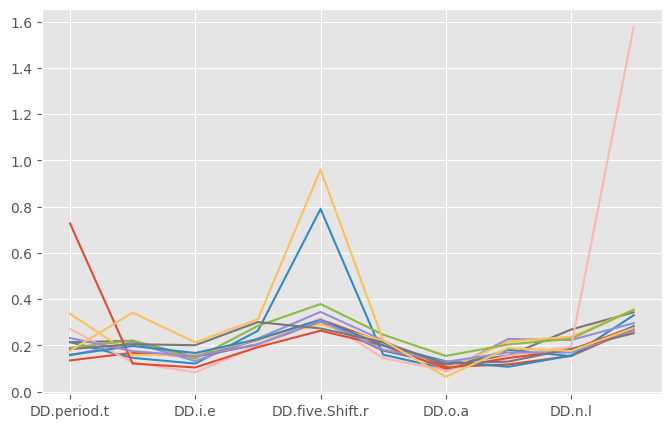

In [38]:
subKeyDDLatency = visual_data.where((visual_data['subject']=='s021')).dropna().sample(n=12)
subKeyDDLatency = subKeyDDLatency[['subject','DD.period.t','DD.t.i','DD.i.e','DD.e.five','DD.five.Shift.r', 'DD.Shift.r.o','DD.o.a','DD.a.n', 'DD.n.l','DD.l.Return']]
subKeyDDLatency = subKeyDDLatency.set_index('subject')
subKeyDDLatency.T.plot(figsize=(8,5), legend=False)